# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [3]:
data_reviews = pd.DataFrame(data_reviews)

In [4]:
data_reviews.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,76561198003030375,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN


In [5]:
data_reviews.to_csv('new_data_reviews.csv')

**Games**

In [6]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [7]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [8]:
data_games.to_csv('new_data_games.csv')

### Análisis Exploratorio de Datos

__Qué es Steam?__  
Steam es un sistema de distribución de juegos multiplataforma en línea, con alrededor de 75 millones de usuarios activos, alrededor de 172 millones de cuentas en total, que aloja más de 3000 juegos, lo que lo convierte en una plataforma ideal para el tipo de trabajo que aquí se presenta. El conjunto de datos contiene registros de más de 3000 juegos y aplicaciones.  

Steam es un servicio de distribución digital de videojuegos de Valve. Se lanzó como un cliente de software independiente en septiembre de 2003 como una forma de que Valve proporcionara actualizaciones automáticas para sus juegos y se expandió para incluir juegos de editores externos. Steam también se ha expandido a una tienda digital móvil y basada en la web en línea.  

De acuerdo con la popularidad del juego, la similitud de la descripción del juego, la calidad del juego y la preferencia del jugador por el juego, recomiendan el juego correspondiente al jugador del juego, de modo que Steam obtenga un mayor grado de satisfacción del cliente.

1. __Se importan las librerías__ necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc # garbage collector

from surprise import Dataset # convertimos nuestro Dataframe en Dataset
                             # es la estructura de datos que utiliza Surprise!, para almacenar la Matriz de Utilidad
                             # es la forma de almacenar datos con menos memoria, ya que la Matriz de Utilidad es muy grande     
from surprise import Reader # lector de Surprise!
from surprise.model_selection import train_test_split
# quita calificacione de usuario-película de forma aleatoria s/ toda la matriz de utilidad, teniendo cuidado de no quitarle..
# ..todas las calificaciones a un usuario ni a una película

#### DATA REVIEW

1. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [2]:
new_data_review = pd.read_csv('new_data_reviews.csv')

In [3]:
new_data_review.shape # Filas y columnas

(779307, 13)

* *El Dataset, cuenta con **779.307 Filas**, y **13 Columnas**.*

In [4]:
new_data_review.head(3) # Primeras 3 instancias (filas)

,Unnamed: 0,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN


2. __Valores Faltantes:__ se imprimen en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna. En un principio es a mera exposición, ya que por el momento no vamos a descartar ninguno de ellos,ni realizar imputación de datos.

In [5]:
new_data_review.isnull().sum() # Nombres de las columnas y su cantidad de faltantes

Unnamed: 0           0
username            18
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text              1839
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

* *Variables con elementos faltantes:*  
    *1. `compensation` **98%** (764.719);*  
    *2. `found_funny` **86%** (659.143);*  
    *3. `user_id` 59% c/u (461.967);*  
    *4. `hours` 0,3% (2.637);*  
    *5. `text` 0,2% (1.839);*  
    *6. `product` 0,2% (1.566).*

#### DATA GAMES

1. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [6]:
new_data_games = pd.read_csv('new_data_games.csv')

In [7]:
new_data_games.shape # Filas y columnas

(32135, 17)

* *El Dataset, cuenta con **32.135 Filas**, y **13 Columnas**.*

In [8]:
new_data_games.head(3) # Primeras 3 instancias (filas)

,Unnamed: 0,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN


2. __Valores Faltantes:__ se imprimen en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna. En un principio es a mera exposición, ya que por el momento no vamos a descartar ninguno de ellos,ni realizar imputación de datos.

In [9]:
new_data_games.isnull().sum() # Nombres de las columnas y su cantidad de faltantes

Unnamed: 0            0
publisher          8062
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29528
dtype: int64

* *Casi todos las Variables tienen elementos faltantes. Detallamos las principales:*  
    *1. `discount_price` **98%** (31.910);*  
    *2. `metascore` **98%** (29.528);*  
    *3. `publisher` 59% c/u (8.062);*  
    *4. `sentiment` 0,3% (7.182);*  
    *5. `developer` 0,2% (3.299);*  
    *6. `genres` 0,2% (3.283).*
    
* *Cabe aclarar que el `id` de los juegos, tienen 2 valores faltantes.*
* *`metascore` refiere a la media de todas las reseñas recibidas para dicho juego.*

In [10]:
# new_data_games[new_data_games.id == '35140']

#### EXPLORANDO EL DATASET

1. ¿Cuántos usuarios únicos hay?

In [11]:
print(len(new_data_review['username'].unique()))

540339


* 540339 usuarios jugaron al juego.

2. ¿Cuántos tipos de calificaciones hay?

In [12]:
pd.unique(new_data_games['sentiment'])

array([nan, 'Mostly Positive', 'Mixed', '1 user reviews',
       '3 user reviews', '8 user reviews', 'Very Positive',
       'Overwhelmingly Positive', '6 user reviews', '5 user reviews',
       '2 user reviews', 'Very Negative', 'Positive', 'Mostly Negative',
       '9 user reviews', 'Negative', '4 user reviews', '7 user reviews',
       'Overwhelmingly Negative'], dtype=object)

In [13]:
print(new_data_games['sentiment'].value_counts())

Mixed                      4103
Very Positive              3868
Positive                   3281
Mostly Positive            2744
1 user reviews             2496
2 user reviews             1756
3 user reviews             1231
4 user reviews              964
5 user reviews              846
Mostly Negative             802
6 user reviews              756
7 user reviews              619
8 user reviews              537
9 user reviews              488
Overwhelmingly Positive     303
Negative                    123
Very Negative                29
Overwhelmingly Negative       7
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Número de Calificaciones por Tipo')

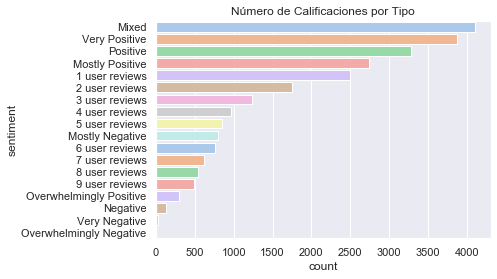

In [14]:
sns.countplot(data = new_data_games, y = 'sentiment', order = new_data_games['sentiment'].value_counts().index, palette='pastel')
plt.title('Número de Calificaciones por Tipo')

In [15]:
pd.unique(new_data_games['metascore'])

array([nan, 96., 84., 80., 76., 70., 69., 81., 75., 72., 66., 67., 77.,
       91., 89., 83., 61., 88., 65., 94., 57., 86., 87., 92., 79., 82.,
       58., 74., 85., 90., 68., 71., 60., 73., 59., 64., 54., 53., 78.,
       51., 44., 63., 38., 56., 49., 52., 62., 93., 48., 34., 95., 43.,
       55., 24., 46., 41., 20., 39., 45., 35., 47., 40., 36., 50., 32.,
       37., 33., 42., 27., 29., 30.])

In [16]:
print(new_data_games['metascore'].value_counts())

80.0    125
74.0    107
77.0    104
75.0    103
76.0    102
       ... 
42.0      1
33.0      1
34.0      1
20.0      1
29.0      1
Name: metascore, Length: 70, dtype: int64


Text(0.5, 1.0, 'Número de Calificaciones por Tipo')

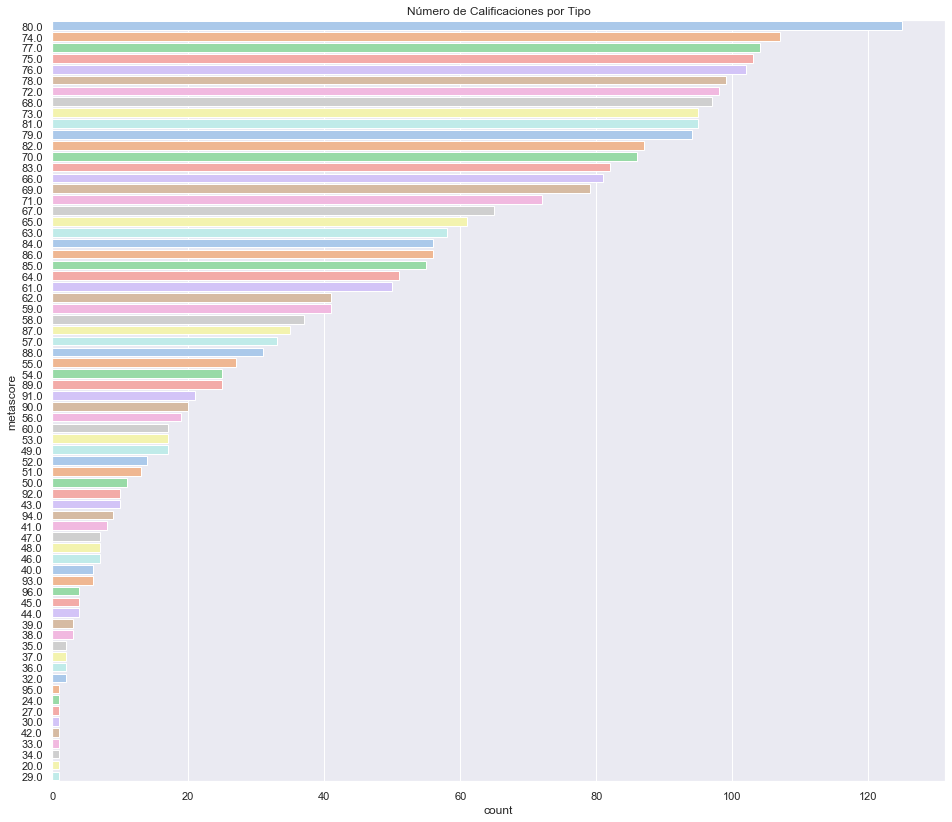

In [17]:
plt.figure(figsize = (16,14))
sns.countplot(data = new_data_games, y = 'metascore', order = new_data_games['metascore'].value_counts().index, palette='pastel')
plt.title('Número de Calificaciones por Tipo')

3. ¿Cuántos juegos jugó cada usuario?

In [18]:
df1_by_users = new_data_review.groupby(['hours']).count()
df1_by_users

# Vemos cuántas calificaciones de juego realizó cada usuario

,Unnamed: 0,username,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
hours,,,,,,,,,,,,
0.0,459,459,456,459,459,459,456,459,459,144,2,72
0.1,9233,9232,9187,9233,9233,9233,9192,9233,9233,3257,308,2545
0.2,11310,11310,11266,11310,11310,11310,11269,11310,11310,4245,371,2878
0.3,9516,9516,9485,9516,9516,9516,9489,9516,9516,3577,319,2187
0.4,8615,8615,8575,8615,8615,8615,8589,8615,8615,3234,288,1968
...,...,...,...,...,...,...,...,...,...,...,...,...
19205.2,1,1,1,1,1,1,1,1,1,1,0,1
20018.9,1,1,1,1,1,1,1,1,1,0,0,0
20573.3,1,1,1,1,1,1,1,1,1,0,0,1


3. ¿Cómo es la distribución de las horas jugadas?¿Pueden concluir algo de ese gráfico?

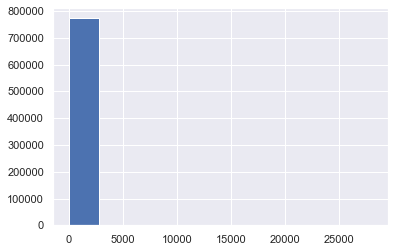

In [19]:
new_data_review['hours'].hist()
plt.show()

* El mayor número de horas jugadas, se encuentra entre 0 y 2.500 hs.

4. ¿Cómo es la distribución del número de calificaciones por usuario?

In [20]:
hs_por_usuario = new_data_review.username.value_counts() # Vemos por usuario, el conteo de dichas calificaciones
hs_por_usuario # 1er columnas es el ID del usuario, la segunda, la cantidad de calificaciones que dió

123                213
Alex               190
Chris              155
Nick               143
Matt               137
                  ... 
PWNomancer           1
Red Phoenix          1
k.ripp13             1
IHOP TO WALMART      1
Mini_Meatwad         1
Name: username, Length: 540338, dtype: int64

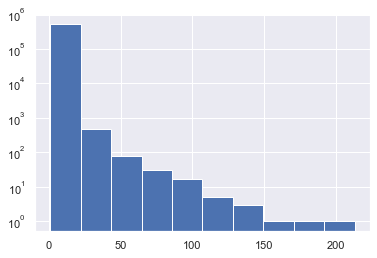

In [21]:
hs_por_usuario.hist(log = True)

* Es el mismo que hicimos arriba, de cantidad de usuarios de acuerdo a las hs que jugaron.

#### FILTRO COLABORATIVO

* __Recomendación Colaborativa:__ se buscan Usuarios similares a mi, y de acuerdo a ello, se usan los productos que ellos consumen para recomendarmelos a mí (que yo no he usado, consumido, escuchado, etc.). Se utiliza lo que se sabe de mí y en función de ello se buscan usuarios que se parecen a mí.
    * Ventajas: no necesito tener info acerca de los productos.
    * Desventajas: necesitamos tener la matríz de utilidad (que es muy dispersa) y llenarla es costosa en tiempo y dinero.
    
* Necesitamos un dataset donde cada fila represente un `usuario`, un `juego` y la `calificación del usuario` a ese juego. Es decir, tiras de tres componentes. Hay otra información que puede ser útil, pero con esos tres datos ya podemos implementar un filtro colaborativo.

1. Seleccionamos aquellos **features que nos seran útiles** a la hora de aplicar un **filtro colaborativo**.

In [22]:
df1 = new_data_review[['username','hours','product_id']]
df1

,username,hours,product_id
0,Chaos Syren,0.1,725280
1,Ariman1,13.2,328100
2,freakfantom,0.1,725280
3,The_Cpt_FROGGY,7.8,631920
4,the_maker988,8.2,35140
...,...,...,...
779302,Vidaar,783.5,252490
779303,Nikolai Belinski,55.1,252490
779304,RancorZealot,203.5,252490
779305,Jerry,139.8,252490


* Vamos a identificar los títulos de los juegos.

In [23]:
df_titulo = new_data_games[['id','title']]
df_titulo

,id,title
0,761140.0,Lost Summoner Kitty
1,643980.0,Ironbound
2,670290.0,Real Pool 3D - Poolians
3,767400.0,弹炸人2222
4,773570.0,NaN
...,...,...
32130,773640.0,Colony On Mars
32131,733530.0,LOGistICAL: South Africa
32132,610660.0,Russian Roads
32133,658870.0,EXIT 2 - Directions


In [24]:
df_new = df_titulo.rename(columns={'id':'product_id'})
df_new

,product_id,title
0,761140.0,Lost Summoner Kitty
1,643980.0,Ironbound
2,670290.0,Real Pool 3D - Poolians
3,767400.0,弹炸人2222
4,773570.0,NaN
...,...,...
32130,773640.0,Colony On Mars
32131,733530.0,LOGistICAL: South Africa
32132,610660.0,Russian Roads
32133,658870.0,EXIT 2 - Directions


In [25]:
print(df_new['product_id'])

0        761140.0
1        643980.0
2        670290.0
3        767400.0
4        773570.0
           ...   
32130    773640.0
32131    733530.0
32132    610660.0
32133    658870.0
32134    681550.0
Name: product_id, Length: 32135, dtype: float64


In [26]:
#df_new['product_id'].dropna
df_title = df_new[df_new['product_id'].notna()]

In [27]:
df_title.isnull().sum()

product_id       0
title         2049
dtype: int64

In [28]:
print(df_title['product_id'])

0        761140.0
1        643980.0
2        670290.0
3        767400.0
4        773570.0
           ...   
32130    773640.0
32131    733530.0
32132    610660.0
32133    658870.0
32134    681550.0
Name: product_id, Length: 32133, dtype: float64


In [29]:
df_title[('product_id')] = df_title['product_id'].astype(int)

<ipython-input-29-9206b7264802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title[('product_id')] = df_title['product_id'].astype(int)


In [30]:
print(df_title)

       product_id                     title
0          761140       Lost Summoner Kitty
1          643980                 Ironbound
2          670290   Real Pool 3D - Poolians
3          767400                   弹炸人2222
4          773570                       NaN
...           ...                       ...
32130      773640            Colony On Mars
32131      733530  LOGistICAL: South Africa
32132      610660             Russian Roads
32133      658870       EXIT 2 - Directions
32134      681550                       NaN

[32133 rows x 2 columns]


In [31]:
df_title

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN
...,...,...
32130,773640,Colony On Mars
32131,733530,LOGistICAL: South Africa
32132,610660,Russian Roads
32133,658870,EXIT 2 - Directions


2. **Analizamos los datos**.

Primero, llevamos el dataset al formato que le gusta a la biblioteca. ¿En qué orden tienen que estar los atributos? Investigar qué hace la clase `Reader` y cuáles son sus parámetros.

In [32]:
reader = Reader() # Para que pueda leer Surprise

Luego, creamos el `Dataset` de Surprise usando `Dataset.load_from_df`

* Un Dataset de Surprise, es muy parecido a un Dataframe de Pandas, sólo que es una estructura que utiliza menos memoria.

In [33]:
N_filas = 100000 # Limitamos el dataset a N_filas

data = Dataset.load_from_df(df1[['username','hours','product_id']][:N_filas], reader) # Decimos cuáles y cuántas filas elegimos
# Cargamos un Dataset, a partir de un Dataframe

### Entrenamiento

In [34]:
trainset, testset = train_test_split(data, test_size=.25) # OJO! Es el de Surprise. Es un Split del Dataset Completo

Vamos a entrenar un algoritmo SVD. Explorar sus parámetros y su funcionamiento.

In [35]:
from surprise import SVD # OJO! Es también es de Surprise!
algo = SVD() # Usamos los hiperparámetros predeterminados

Entrenamos sobre el `trainset`

In [36]:
algo.fit(trainset)

# Entrenamos la Matriz de Utilidad de Train y de Test
# No hay y
# Entrena SVD sobre toda la Matriz de Utilidad (No s/ X e y)

Y predecimos sobre el `testset`. Notar que para predecir sobre un conjunto de test se usa la función `test`.

In [37]:
predictions = algo.test(testset)

Explorar las característica de `predictions` y alguno de sus elementos

In [38]:
predictions[1] # Predicción para 1 (para un usuario en particular)

# uid: Id del Usuario
# iid: Id del juego
# r_ui: calificación que le da a ese juego en particular (la conocida)
# est: estimación de la calificación (obtenida de SVD)
# was imposible = False: fue posible calificar el juego

Prediction(uid='Couper', iid=15.7, r_ui=227940.0, est=5, details={'was_impossible': False})

En cambio, si queremos predecir para un usuario y un juego en particular, usamos la función `predict`

In [39]:
algo.predict(1345,28)

Prediction(uid=1345, iid=28, r_ui=None, est=5, details={'was_impossible': False})

* r_ui=None: El usuario no la calificó dicho juego.

Exploremos un usuario, veamos cuáles juegos le gustaron y cuáles les recomienda el sistema.

Juegos que le gustaron

In [57]:
usuario = 1539350
rating = 5   # le pedimos peliculas a las que haya puesto 4 o 5 estrellas
df_user = df1[(df1['User'] == usuario) & (df1['Rating'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user['Name'] = df_title['Name'].loc[df_user.Movie_id].values
df_user

,username,hours,product_id,title


Creamos donde vamos a guardar las recomendaciones para 1 usuario en particular

In [13]:
recomendaciones_usuario = df_title.iloc[:4499].copy()
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,Name
Movie_Id,
1,Dinosaur Planet
2,Isle of Man TT 2004 Review
3,Character
4,Paula Abdul's Get Up & Dance
5,The Rise and Fall of ECW


Sacamos del dataframe todas las películas que ya sabemos que vio

In [14]:
usuario_vistas = df1[df1['User'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(97, 3)


,User,Rating,Movie_id
219870,1539350,3,33
409717,1539350,4,111
445206,1539350,3,127
664099,1539350,4,175
894718,1539350,4,197


Vemos las recomendaciones que ya podemos hacerle a dicho usuario

In [15]:
recomendaciones_usuario.drop(usuario_vistas.Movie_id, inplace = True)
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,Movie_Id,Name
0,1,Dinosaur Planet
1,2,Isle of Man TT 2004 Review
2,3,Character
3,4,Paula Abdul's Get Up & Dance
4,5,The Rise and Fall of ECW


Y hacemos las recomendaciones, con el Id de película específico, y ordenados de mayor a menor.  
Abajo la Recomendación con su valor.

In [16]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['Movie_Id'].apply(lambda x: algo.predict(usuario, x).est)

In [17]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
print(recomendaciones_usuario.head(10))
# Recomendaciones con valuaciones estimadas por debajo

    Movie_Id                                               Name  \
12        13  Lord of the Rings: The Return of the King: Ext...   
24        25      Inspector Morse 31: Death Is Now My Neighbour   
4          5                           The Rise and Fall of ECW   
27        28                                    Lilo and Stitch   
0          1                                    Dinosaur Planet   
29        30                             Something's Gotta Give   
17        18                                   Immortal Beloved   
28        29                                            Boycott   
2          3                                          Character   
1          2                         Isle of Man TT 2004 Review   

    Estimate_Score  
12        4.401893  
24        4.042930  
4         3.951969  
27        3.840933  
0         3.835266  
29        3.805223  
17        3.800356  
28        3.698979  
2         3.667432  
1         3.665474  


### 2. Evaluación

Para el conjunto de `testset`, evaluamos el error RMSE entre las predicciones y las verdaderas calificaciones que le habían dado a las películas. Para eso, buscar en la documentación cómo se hace.

In [18]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 1.0549


1.0549414282258476

__Nota:__ con `SVD++`, se reducirá aún más el Error.

### 3. Optimización de parámetros

**Ejercicio**: hacer un gráfico del desempeño del modelo en función del número de factores del `SVD`.

In [19]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256] # Determinamos cuántos valores latentes queremos descubrir

for factor in factores:
    print(f'\nNúmero de Factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))
    
# Va a hacer muchas Ejecuciones, y en c/u de ellas va a ir evaluando los resultados (éste es el proceso manual)


Número de Factores: 1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0400  1.0500  1.0450  1.0450  0.0041  
Fit time          2.22    2.21    2.23    2.22    0.01    
Test time         0.45    0.56    0.56    0.53    0.05    

Número de Factores: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0397  1.0449  1.0486  1.0444  0.0037  
Fit time          2.29    2.25    2.30    2.28    0.02    
Test time         0.45    0.47    0.49    0.47    0.02    

Número de Factores: 4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0507  1.0474  1.0404  1.0462  0.0043  
Fit time          2.53    2.56    2.39    2.49    0.07    
Test time         0.64    0.56    0.47    0.56    0.07    

Número de Factores: 8
Evaluating RMSE of algorithm SVD on 3 split(s).

    

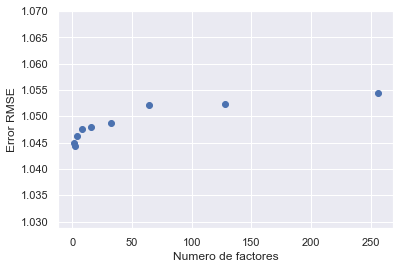

In [20]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

**Ejercicio**: recordar que, cuando entrenamos un `SVD`, estamos usando descenso por gradiente para minimizar una función de costo. Usar `GridSearchCV` para buscar valores óptimos para los siguientes parámetros (tres por parámetros, utilizar los valores default de referencia): `n_factors`, `n_epochs`, `lr_all` y `reg_all`. Estudiar qué representa cada uno de ellos mientras esperan. Tomarse un café.

In [21]:
# La otra manera de decubrir los valores latentes, pero de forma automática, es a través de Gridsearch

from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

# n_jobs = -1: usa todos los cores de procesamiento de la máquina

In [22]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.0456353875772033
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


## Extra: Agrandando el Dataset

Podemos sumar al dataset el resto de las calificaciones que no usamos.

Como corremos el riesgo de que se nos llene la memoria RAM, vamos a hacerlo de a poco y con cuidado. Arrancamos agregando las calificaciones que hay en `combined_data_2.txt`.

0. Reiniciar el Kernel
1. Abrir el archivo `combined_data_2.txt` con la función `load_data`.
2. Agregar una columna con el `Movie_id` al que corresponden las calificaciones. Si te animas, puedes crear una función que realice este paso.
3. Opcional: filtrar películas con pocas calificaciones
4. Abrir el archivo donde ya está procesado `combined_data_1.txt`. 
5. Agregar al final las nuevas calificaciones y guardarlo en un nuevo archivo.


Una vez que estén contentos con el procedimientos, repetir los pasos anteriores para los archivos faltantes.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc #garbage collector

In [24]:
### 1

def load_data(name):
    df = pd.read_csv(name, header = None, names = ['User','Rating'], usecols = [0,1])
    return df


df2 = load_data('combined_data_2.txt')
print(df2.shape)

(26982302, 2)


In [25]:
### 2.
movies_ids_df2 = df2.User[df2.Rating.isna()].values
print(movies_ids_df2)
print(len(movies_ids_df2))

movies_ids_df2 = np.arange(4500,len(movies_ids_df2) + 4500)
print(movies_ids_df2)

['4500:' '4501:' '4502:' ... '9208:' '9209:' '9210:']
4711
[4500 4501 4502 ... 9208 9209 9210]


In [26]:
df2_nan = pd.DataFrame(pd.isnull(df2.Rating))
df2_nan = df2_nan[df2_nan['Rating'] == True]
idx_movies_ids = df2_nan.index.values
print(idx_movies_ids)

[       0      259      855 ... 26961403 26980373 26980497]


In [27]:
# Agregamos el indice de la ultima instancia del dataframe
idx_movies_ids = np.append(idx_movies_ids,df2.shape[0])
cantidad_criticas = np.diff(idx_movies_ids)
cantidad_criticas

array([  259,   596,   105, ..., 18970,   124,  1805], dtype=int64)

In [28]:
columna_movie_id = np.array([])
for i in range(cantidad_criticas.size):
    aux = np.full(cantidad_criticas[i], movies_ids_df2[i])
    columna_movie_id = np.concatenate((columna_movie_id, aux))

In [29]:
df2['Movie_id'] = columna_movie_id
del columna_movie_id

df2.dropna(inplace = True)
df2['User'] = df2['User'].astype(int)
df2['Movie_id'] = df2['Movie_id'].astype(np.int16)
df2['Rating'] = df2['Rating'].astype(np.int8)

gc.collect()

1625

In [30]:
df2

,User,Rating,Movie_id
1,2532865,4,4500
2,573364,3,4500
3,1696725,3,4500
4,1253431,3,4500
5,1265574,2,4500
...,...,...,...
26982297,2420260,1,9210
26982298,761176,3,9210
26982299,459277,3,9210
26982300,2407365,4,9210


In [31]:
### 4.

df1 = pd.read_csv('combined_data_1_with_movie_id.csv', dtype={'Rating': np.int8, 'Movie_id': np.int16})
print(df1.shape)
df1.head()

(24053764, 3)


,User,Rating,Movie_id
0,1488844,3,1
1,822109,5,1
2,885013,4,1
3,30878,4,1
4,823519,3,1


In [32]:
### 5.

df = df1.copy()
del df1
df = df.append(df2)
print(df.shape)

(51031355, 3)


Chequeamos que estén todas las películas:

In [33]:
peliculas_presentes = df.Movie_id.unique()
peliculas_presentes

array([   1,    2,    3, ..., 9208, 9209, 9210], dtype=int16)

In [34]:
print((peliculas_presentes - np.arange(1,9210 + 1)).sum())

0


Y guardamos

In [35]:
if True:
    df.to_csv('combined_data_1y2_with_movie_id.csv', index= False)

Ver usuarios que juegan la misma cantidad de horas cada juego. Esos serán parecidos a mi.

matriz usuario usuario y producto producto

user id horas  
horas product id  
labelencoding de username

modelo con horas  
modelos con metascore

las hacemos por separado

filtro colaborativo  
reduccion de dimensionalidad con SVD